# Clase 13 - Reconocimiento de Patrones en Imagenes

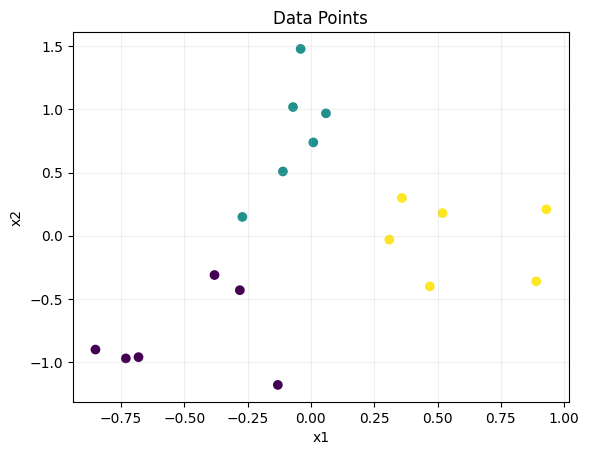

In [ ]:
# Librerías principales: numpy para cálculos numéricos y matplotlib para graficar
import numpy as np
import matplotlib.pyplot as plt

# Definición de los puntos de datos D.
# Cada fila tiene la forma [x1, x2, clase]. Hay 3 clases: 1, 2 y 3.
D = [[-0.1306,  -1.1811, 1],
    [-0.7306,   -0.9711, 1],
    [-0.8506,   -0.9011, 1],
    [-0.6806,   -0.9611, 1],
    [-0.3806,   -0.3111, 1],
    [-0.2806,   -0.4311, 1],
    [-0.2706,    0.1489, 2],
    [-0.1106,    0.5089, 2],
    [ 0.0594,    0.9689, 2],
    [-0.0406,    1.4789, 2],
    [-0.0706,    1.0189, 2],
    [ 0.0094,    0.7389, 2],
    [0.9294,    0.2089, 3],
    [0.3094,   -0.0311, 3],
    [0.3594,    0.2989, 3],
    [0.4694,   -0.4011, 3],
    [0.5194,    0.1789, 3],
    [0.8894,   -0.3611, 3]]

# Convertimos la lista a un array de numpy para facilitar indexado y operaciones vectoriales.
D = np.array(D)

# Graficamos los puntos: las dos primeras columnas son coordenadas (x1, x2),
# y la tercera columna se usa para colorear según la clase.
plt.figure()
plt.scatter(D[:,0], D[:,1], c=D[:,2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data Points')
plt.grid(alpha=0.2)
plt.show()

In [ ]:
# Calculamos el vector de medias (media de cada dimensión) sobre todas las muestras
# D[:,:2] selecciona solo las columnas de atributos (x1, x2), omitiendo la etiqueta de clase.
V = np.mean(D[:,:2], axis=0)
# V es un array con dos elementos: [media_x1, media_x2]
print("Vector de medias: ", V)

Vector de medias:  [-4.44444444e-05  1.11111111e-05]


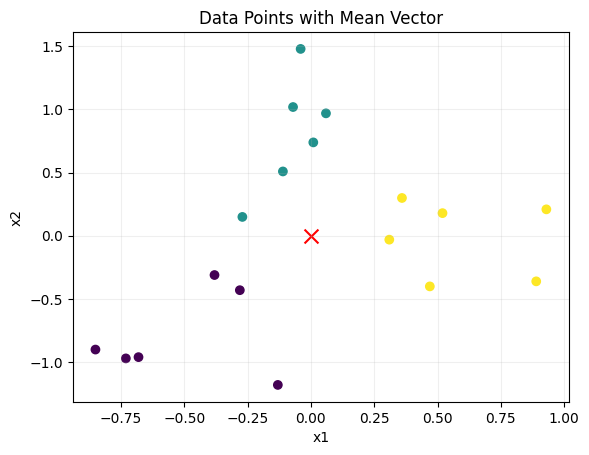

In [ ]:
# Visualizamos los puntos y marcamos el vector de medias en la gráfica
plt.figure()
plt.scatter(D[:,0], D[:,1], c=D[:,2])
# Marcador 'x' rojo para la media global de las dos dimensiones
plt.scatter(V[0], V[1], color='red', marker='x', s=100, label='Mean Vector')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(alpha=0.2)
plt.title('Data Points with Mean Vector')
plt.show()

In [ ]:
def get_clusters(D):
    """
    Divide el dataset D en sub-arrays por clase y devuelve tres arrays
    Cada array contiene solo las dos primeras columnas (x1, x2) para la clase correspondiente.
    Entrada: D (array) con columnas [x1, x2, clase]
    Salida: tupla (cluster1, cluster2, cluster3)
    """
    # Suponemos que las clases estan numeradas 1,2,3 - se crea un array [1,2,3]
    clusters = np.arange(1,4)  # retorna [1 2 3]
    cluster_data = {}
    for id_cluster in clusters:
        # idx es un boolean mask que selecciona las filas cuyo valor en la columna 2 coincide con la clase
        idx = D[:,2] == id_cluster
        # Guardamos solo las columnas de atributos (x1, x2) para esa clase
        cluster_data[id_cluster] = D[idx,:2]

    # Devolvemos los clusters en orden 1,2,3
    return cluster_data[1] , cluster_data[2] , cluster_data[3]

Mean clusters:  [[-0.50893333 -0.79276667]
 [-0.0706      0.81056667]
 [ 0.5794     -0.01776667]]


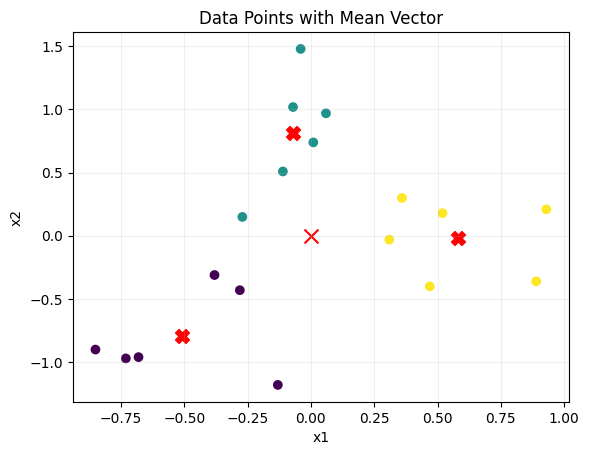

In [ ]:
# Obtenemos los puntos por clase usando la función definida anteriormente
cluster1, cluster2, cluster3 = get_clusters(D)

# Calculamos la media de cada cluster por separado. np.mean aplicado sobre una lista de arrays
# con axis=1 devuelve un array de medias por cluster [[mx1, mx2], ...].
mean_clusters = np.mean([cluster1, cluster2, cluster3], axis=1)
print("Mean clusters: ", mean_clusters)

# Graficamos los puntos y superponemos la media global y las medias por cluster.
plt.figure()
plt.scatter(D[:,0], D[:,1], c=D[:,2])
plt.scatter(V[0], V[1], color='red', marker='x', s=100, label='Mean Vector')
# Marcadores 'X' para las medias de cada cluster (mayor visibilidad)
plt.scatter(mean_clusters[:,0], mean_clusters[:,1], color='red', marker='X', s=100, label='Cluster Means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(alpha=0.2)
plt.title('Data Points with Mean Vector')
plt.show()